# Electronic Structure

The computation of electronic properties is a key tool to characterize crystalline materials to describe those properties dependent on the behavior of electrons within the crystalline structure. In <span style="font-variant: small-caps;">Crystal</span> plenty of tools are available to evaluate and describe [one electron properties](https://tutorials.crystalsolutions.eu/tutorial.html?td=properties&tf=properties_tut). 

In this tutorial we will introduce some of the tools available in CRYSTALClear to plot and study the electronic structure of materials:
* **Band Structure**
* **Density of States**

First, though, a few preliminary steps are required.

In [1]:
from CRYSTALClear.crystal_io import Properties_output
import CRYSTALClear.plot as CCplt
import matplotlib.pyplot as plt

<a id='band'></a>
### 1. Band Structure

In CRYSTALClear it is possible to plot the band structure computed through a <span style="font-variant: small-caps;">Properties</span> calculations starting from the ***BAND.DAT*** or the ***.f25*** generated as computation output. To do so we first need to generate the crystal object containing the necessary informations for the plot. For the purpose of this tutorial we will start from a BAND.DAT file, all of the following instruction, though, remain valid also for the .f25 file.

In [2]:
# Definition of the BAND.DAT file
band = 'mgo_band.BAND'

# Creation of the Crystal Object
band = Properties_output().read_electron_band(band)

To generate the band structure plot the only required argument is the Crystal Object generated above, some additional argument, though, might help with the plot readability or customize it to your taste:
* ``energy_range``: Will limit the range of energy displayed in the band structure plot
* ``linewidth``: Will specify the thickness of the band structure lines
* ``figsize``: Will allow you to specify the dimensions  and the aspect ratio of the plot
* ``k_labels``: Will specify the tick labels associated with the high symmetry point explored in the band structure calculation


Given this premises we can proceed plotting the MgO band structure. 

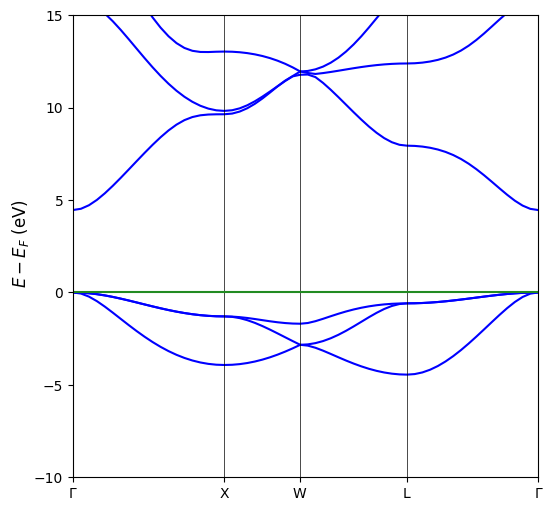

In [3]:
# Plot generation
CCplt.plot_electron_band(band, energy_range=[-10,15], linewidth=1.5, figsize=(6,6), k_labels=['Gamma','X','W','L','Gamma'])
plt.show()

From time to time it might come in handy to plot two or more different band structures of the same material to see how it changes under given conditions or how its band structure is affected bythe functional. This is possible in CRYSTALClear under the only caviat that **the two calculations must have the same space group and identical path**. To generate such plot we will need to first generate the Crystal Objects associated with each of the the band structure we intend to plot.

In [4]:
# Definition of the BAND.DAT files to plot
bands = ['mgo_band.BAND', 'mgo_band_b3lyp.BAND']

# Generation of the Crystal Objects associated with each file
for index, file in enumerate(bands):
    bands[index] = Properties_output().read_electron_band(file)

Once we have generated the list of Crystal Objects we can generate the plot using the same function used for the single band structure. The plotting function will internally scale the different band structure to match the high symmetry point location and the path end point. 

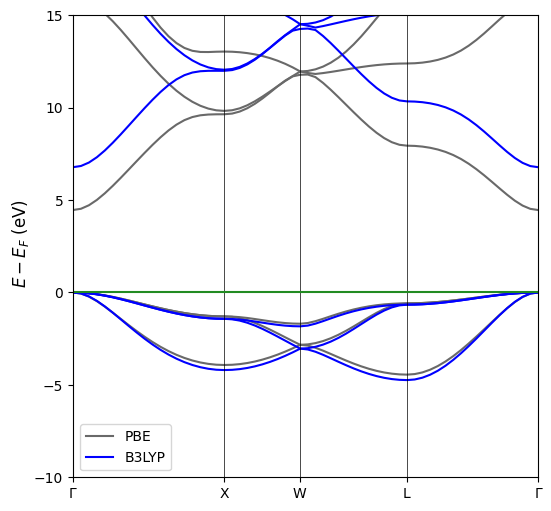

In [5]:
# Plot Generation
CCplt.plot_electron_band(bands, energy_range=[-10,15], linewidth=1.5, figsize=(6,6), k_labels=['Gamma','X','W','L','Gamma'], labels=['PBE','B3LYP'])
plt.show()

<a id='doss'></a>
### 2. Density of States (DOSS)

Similarly to the band structure it is possible to plot the density of state of a given material starting from the ***DOSS.DAT*** or ***.f25*** generated by a corresponding <span style="font-variant: small-caps;">Properties</span> calculation. Again we will show here the proceadure for the DOSS.DAT file, which is identincal to the one for the .f25. 

The first step is, once more, to generate the Crystal Object containing the information necessary for the plot:

In [6]:
# DOSS.DAT path declaration
doss = 'mgo_doss_partialao.DOSS'

# Crystal Object generation
doss = Properties_output().read_electron_dos(doss)

Once the Crystal Object is generated we can create the plot using the ``CCplt`` module in CRYSTALClear. Like before the only required argument for the ``plot_electron_dos()`` function is the Crystal Object itself, but a few additional arguments might help making the plot more readable or customize to your taste:

* ``overlap=True``: Will allow you to plot all of the projections contained in the DOSS.DAT file in a single plot
* ``color``: Will assign a color to each of the projection plotted
* ``labels``: Will assign a label to each of the projection plotted
* ``dos_range``: Will define the DOS range displayed on the *y axe* of the plot  

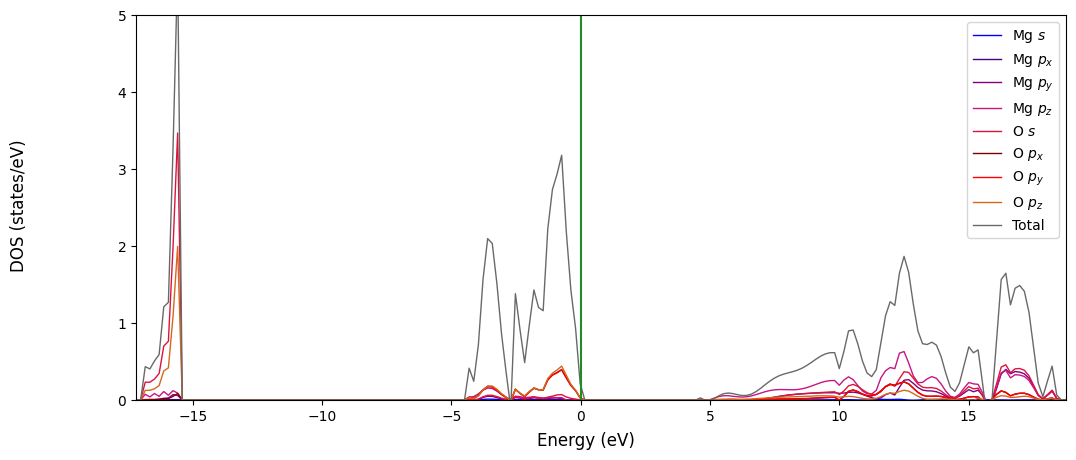

In [7]:
# Plot generation
CCplt.plot_electron_dos(doss, overlap=True, color=['blue', 'indigo', 'purple', 'mediumvioletred', 'crimson', 'maroon', 'red', 'chocolate', 'dimgray'], 
                        labels=['Mg $s$', 'Mg $p_x$','Mg $p_y$','Mg $p_z$','O $s$', 'O $p_x$','O $p_y$','O $p_z$', 'Total'], dos_range=[0,5])
plt.show()

### 3. Electronic Structure

Often time it is useful to plot the band structure and the density of states side by side, this is possible in CRYSTALClear starting from the Crystal Object previously created ([``band``](#band) and [``doss``](#doss)). Also in this case the only required arguments for the plot to be generated are the two objects, but we can further customize the plot through some additional arguments consistent with the one described in the previous sections.

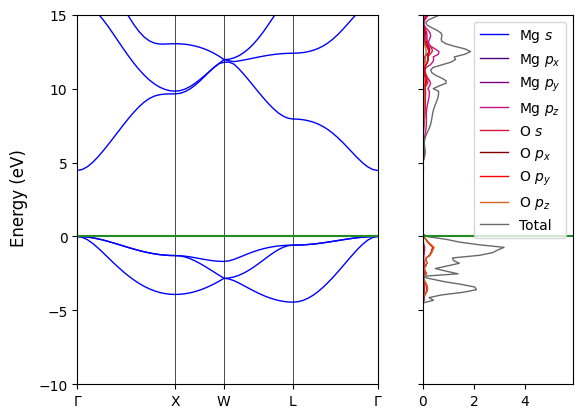

In [8]:
# Plot Generation
CCplt.plot_electron_banddos(band, doss, k_labels=['Gamma','X','W','L','Gamma'], energy_range=[-10,15],
                            color_dos=['blue', 'indigo', 'purple', 'mediumvioletred', 'crimson', 'maroon', 'red', 'chocolate', 'dimgray'],
                            labels=['Mg $s$', 'Mg $p_x$','Mg $p_y$','Mg $p_z$','O $s$', 'O $p_x$','O $p_y$','O $p_z$', 'Total'], legend=True)
plt.show()

If you are looking for further customization options or more advanced feature for any of these plots please refer to the [CRYSTALClear documentation](https://crystaldevs.github.io/CRYSTALClear/CRYSTALClear.html#module-CRYSTALClear.plot)